In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as py
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [184]:
train=pd.read_csv("train.csv")

In [185]:
#dropping columns

train.drop(['ID'],axis=1,inplace=True)
train.drop(['Username'],axis=1,inplace=True)

In [186]:
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942,2,7855,42
1,a,26046,12,55801,1175
2,c,1358,4,8067,60
3,a,264,3,27064,9
4,c,4271,4,13986,83


In [187]:
##outlier treatment

a=[]
##df3 = pd.DataFrame({'A' : [np.nan]})
def Outliers(a):
    for j in a:
        Q3=train[j].quantile(0.75)
        Q1=train[j].quantile(0.25)
        IQR = train[j].quantile(0.75) - train[j].quantile(0.25)
        H=1.5*IQR
        Upper_Whiskar = Q3+H
        Lower_Whiskar = Q1-H
        Q95 = train[j].quantile(0.95)
        Q05 = train[j].quantile(0.05)
    
        print('Q3 for ',j, ': ', Q3)
        print('Q1 for ',j,': ', Q1)
        print('IQR for ',j,': ', IQR)
        print('H for ',j,': ', H)
        print('Upper Whiskar for ',j,': ', Upper_Whiskar)
        print('Lower Whiskar for ',j,': ', Lower_Whiskar)
    
        print('95th Quantile for ',j,': ', Q95)
        print('5th Quantile for',j,': ', Q05)
        ##df3[j] = df[j].clip(lower=Lower_Whiskar,upper = Upper_Whiskar, inplace=False)
        ##df[j].clip(lower=Lower_Whiskar,upper = Upper_Whiskar, inplace=True)
        for i in train[j].index.tolist():
            if(train.at[i,j]<Lower_Whiskar):
                train.at[i,j]= Q05
            if(train.at[i,j]>Upper_Whiskar):
                train.at[i,j]=Q95

            

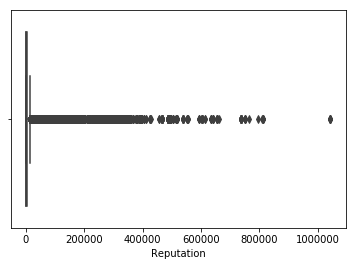

In [188]:
sns.boxplot(train['Reputation'])

In [189]:
Outliers(['Reputation'])

Q3 for  Reputation :  5118.0
Q1 for  Reputation :  282.0
IQR for  Reputation :  4836.0
H for  Reputation :  7254.0
Upper Whiskar for  Reputation :  12372.0
Lower Whiskar for  Reputation :  -6972.0
95th Quantile for  Reputation :  32209.0
5th Quantile for Reputation :  21.0


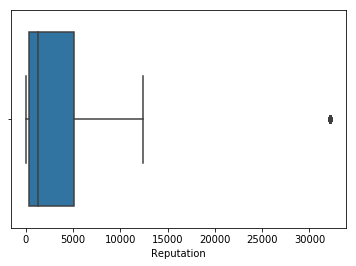

In [190]:
sns.boxplot(train['Reputation'])

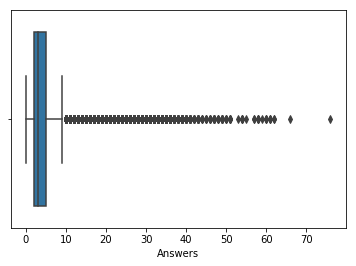

In [191]:
sns.boxplot(train['Answers'])

In [192]:
Outliers(['Answers'])

Q3 for  Answers :  5.0
Q1 for  Answers :  2.0
IQR for  Answers :  3.0
H for  Answers :  4.5
Upper Whiskar for  Answers :  9.5
Lower Whiskar for  Answers :  -2.5
95th Quantile for  Answers :  10.0
5th Quantile for Answers :  1.0


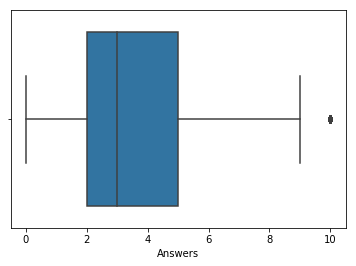

In [193]:
sns.boxplot(train['Answers'])

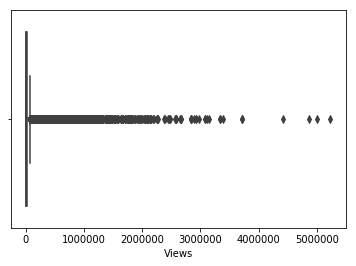

In [194]:
sns.boxplot(train['Views'])

In [195]:
Outliers(['Views'])

Q3 for  Views :  26870.0
Q1 for  Views :  2594.0
IQR for  Views :  24276.0
H for  Views :  36414.0
Upper Whiskar for  Views :  63284.0
Lower Whiskar for  Views :  -33820.0
95th Quantile for  Views :  116699.79999999993
5th Quantile for Views :  310.0


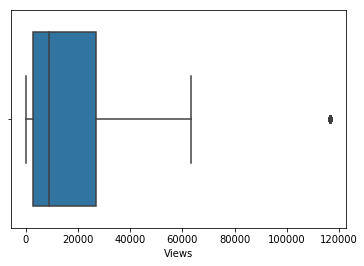

In [196]:
sns.boxplot(train['Views'])

In [197]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [198]:
X = train.iloc[:, 0:4].values
y = train.iloc[:, 4].values



In [199]:
labelencoder=LabelEncoder()

In [200]:
X[:, 0] = labelencoder.fit_transform(X[:, 0])

In [201]:
onehotencoder = OneHotEncoder(categorical_features = [0])

In [202]:

X = onehotencoder.fit_transform(X).toarray()

In [203]:
X = X[:, 0:]

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [205]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [206]:
# Importing the Keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [207]:
#Initializing the ANN model

classifier = Sequential()

In [208]:
#Adding input and first hidden layer

classifier.add(Dense(units=7,kernel_initializer= 'uniform', activation='relu', input_dim=13))

In [209]:
#Adding second hidden layer

classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))

In [210]:
#Adding output layer

classifier.add(Dense(units=1, kernel_initializer = 'uniform',activation='linear'))

In [211]:
#Compile the ANN

classifier.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])


In [212]:
#fitting the ANN to the training data

classifier.fit(X_train,y_train,batch_size=1500,epochs=100)

Epoch 1/100
264036/264036 [==============================] - 1s 5us/step - loss: 14296167.7219 - acc: 0.0228
Epoch 2/100
264036/264036 [==============================] - 1s 3us/step - loss: 14293469.4875 - acc: 0.0310
Epoch 3/100
264036/264036 [==============================] - 1s 3us/step - loss: 14285478.1255 - acc: 0.0346
Epoch 4/100
264036/264036 [==============================] - 1s 3us/step - loss: 14269510.2599 - acc: 0.0325
Epoch 5/100
264036/264036 [==============================] - 1s 3us/step - loss: 14243944.1312 - acc: 0.0291
Epoch 6/100
264036/264036 [==============================] - 1s 3us/step - loss: 14205821.0275 - acc: 0.0250
Epoch 7/100
264036/264036 [==============================] - 1s 3us/step - loss: 14156207.5586 - acc: 0.0197
Epoch 8/100
264036/264036 [==============================] - 1s 4us/step - loss: 14094436.9895 - acc: 0.0160
Epoch 9/100
264036/264036 [==============================] - 1s 3us/step - loss: 14021530.1852 - acc: 0.0131
Epoch 10/100
264036

In [213]:
y_pred=classifier.predict(X_test)

In [218]:
y_pred

array([[-4.756648],
       [-4.756648],
       [-4.756648],
       ...,
       [-4.756648],
       [-4.756648],
       [-4.756648]], dtype=float32)

In [214]:
##Evaluation

from sklearn import metrics

print(metrics.mean_absolute_error(y_test,y_pred))

print(metrics.mean_squared_error(y_test,y_pred))

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

print(metrics.r2_score(y_test, y_pred))

319.58358838204265
6213659.103263078
2492.721224538171
0.20366153812569754


In [223]:
df2=pd.read_csv("test.csv")

In [224]:
df2.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [225]:
X_T = df2.iloc[:, 1:] ## dropping ID variable
X_T.drop(['Username'], axis = 1, inplace = True)
X_T.head()

,Tag,Reputation,Answers,Views
0,a,5645.0,3.0,33200.0
1,c,24511.0,6.0,2730.0
2,i,927.0,1.0,21167.0
3,i,21.0,6.0,18528.0
4,i,4475.0,10.0,57240.0


In [226]:
Tag = X_T['Tag']

In [228]:
## Convert tag into dummies.
X_T['Tag'] = labelencoder.transform(X_T['Tag'])

In [229]:
X_T1 = X_T.copy()

In [230]:
X_T = X_T.values

In [232]:
X_T = onehotencoder.transform(X_T).toarray()
##df= df.toarray()

In [233]:
X_T = pd.DataFrame(X_T)

In [235]:
Upvotes = classifier.predict(X_T)

In [236]:
df2['upvotes']=Upvotes

In [237]:
df2.head()

,ID,Tag,Reputation,Answers,Username,Views,upvotes
0,366953,a,5645.0,3.0,50652,33200.0,83471960.0
1,71864,c,24511.0,6.0,37685,2730.0,66917988.0
2,141692,i,927.0,1.0,135293,21167.0,46542220.0
3,316833,i,21.0,6.0,166998,18528.0,38768284.0
4,440445,i,4475.0,10.0,53504,57240.0,130790512.0


In [239]:
data_to_submit = df2[['ID', 'upvotes']]

In [240]:
data_to_submit.to_csv('ann.csv',index=False)